In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_predict

# 使用pandas读取数据集文件

In [3]:
data = pd.read_csv('ccpp_csv.csv')

# 显示数据的前5行，如果是最后5行：data.tail()

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# 查看数据的维度：表明有9568个样本，每个样本都有5列

In [24]:
data.shape

(9568, 5)

# 准备样本特征，使用AT,V,AP,RH这个4个样例作为样本特征

In [7]:
x = data[['AT','V','AP','RH']]

In [8]:
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


# 使用PE作为样本输出

In [9]:
y = data[['PE']]

In [10]:
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


# 划分数据集，一部分是测试集，一部分是训练集

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [14]:
print x_train.shape

(7176, 4)


In [15]:
print x_test.shape

(2392, 4)


In [16]:
print y_train.shape

(7176, 1)


In [17]:
print y_test.shape

(2392, 1)


# 使用最小二乘法来实现线性回归

In [18]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 拟合完毕后，查看模型系数结果：

In [19]:
print linreg.intercept_

[ 460.05727267]


In [20]:
print linreg.coef_

[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


# 模型评估：使用均方差MES或者根均方差RMES

In [21]:
y_pred = linreg.predict(x_test)
print "MSE:",metrics.mean_squared_error(y_test,y_pred)
print "RMES:",np.sqrt(metrics.mean_squared_error(y_test,y_pred))

MSE: 20.8371915472
RMES: 4.56477727247


# 交叉验证，采用10折交叉验证

In [22]:
predicted = cross_val_predict(linreg,x,y,cv=10)
print "MSE:",metrics.mean_squared_error(y,predicted)
print "RMES:",np.sqrt(metrics.mean_squared_error(y,predicted))

MSE: 20.7936725099
RMES: 4.56000795064


# 画图观察，离中间的直线y=x值越接近的点代表预测损失越低

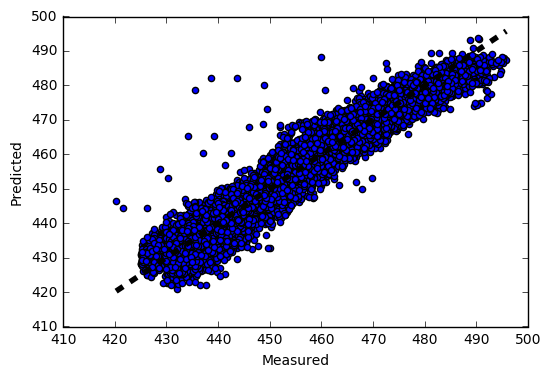

In [23]:
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()